# 1- Gather:

In [1]:
import pandas as pd
import numpy as np
import requests
import os
import json
import tweepy
import time
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
# image predictions dataframe

#creating a folder for the project
folder_name = 'MyDogsProject'
if not os.path.exists(folder_name):
    os.makedirs(folder_name) 
    
#downloading the image-predictions.tsv file   
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

#saving it locally
with open(os.path.join(folder_name, url.split('/')[-1]), mode = 'wb') as file:
    file.write(response.content) 

In [ ]:
# Tweets Df

#accessing Twitter API
consumer_key = 'mc2XXXXXXXXXXXXXXXXXXXQ89'
consumer_secret = 'EGpXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX4am'
access_token = '963XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXRMy'
access_secret = 'kcPXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXz5A'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = time.time()

tweet_ids = archive_df['tweet_id']

# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = time.time()
print(end - start)
print(fails_dict)

#List of dictionaries to convert to a DataFrame
df_list = []

#reading the file with json data
with open('tweet_json.txt', encoding='utf-8') as file:
    for line in file:
        data = json.loads(line)
        # Append to list of dictionaries
        df_list.append({'tweet_id': data['id'],
                    'favs_count': data['favorite_count'],
                    'retweets': data['retweet_count']})
        
#creating the dataframe and saving it to a csv file       
df = pd.DataFrame(df_list, columns = ['tweet_id', 'favs_count', 'retweets']) 
df.to_csv('tweets.csv', index = False)

In [2]:
archive_df = pd.read_csv("twitter-archive-enhanced.csv") # was downloaded manually
images_df = pd.read_csv("image-predictions.tsv", sep = '\t')
tweets_df = pd.read_csv("tweets.csv")

# 2- Assess:

## *Visually*

In [3]:
archive_df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [4]:
archive_df.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2177,669037058363662336,NaN,NaN,2015-11-24 06:17:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have Pancho and Peaches. Pancho is a C...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669037058...,10,10,None,None,None,None,None
1312,707014260413456384,NaN,NaN,2016-03-08 01:25:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Ellie. She requests to be carried arou...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/707014260...,11,10,Ellie,None,None,None,None
1072,739979191639244800,NaN,NaN,2016-06-07 00:36:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Nollie. She's waving at you. If you do...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/739979191...,12,10,Nollie,None,None,None,None
1766,678399652199309312,NaN,NaN,2015-12-20 02:20:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This made my day. 12/10 please enjoy https://t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/678399652...,12,10,None,None,None,None,None
303,836397794269200385,NaN,NaN,2017-02-28 02:09:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Buddy. He ran into a gl...,8.178278e+17,4.196984e+09,2017-01-07 20:18:46 +0000,https://twitter.com/dog_rates/status/817827839...,13,10,Buddy,None,None,None,None


In [5]:
tweets_df

,tweet_id,favs_count,retweets
0,892420643555336193,34986,7341
1,892177421306343426,30294,5478
2,891815181378084864,22788,3621
3,891689557279858688,38250,7530
4,891327558926688256,36532,8110
...,...,...,...
2326,666049248165822465,93,38
2327,666044226329800704,259,122
2328,666033412701032449,107,39
2329,666029285002620928,117,41


In [6]:
tweets_df.sample(5)

,tweet_id,favs_count,retweets
502,810284430598270976,34606,10976
210,850145622816686080,15554,3547
1977,672481316919734272,669,120
607,795400264262053889,9878,2800
611,794355576146903043,0,10068


In [7]:
images_df

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [8]:
images_df.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
143,668620235289837568,https://pbs.twimg.com/media/CUdqjvAWUAANfoU.jpg,1,crash_helmet,0.757942,False,toaster,0.037497,False,mouse,0.027271,False
1711,818536468981415936,https://pbs.twimg.com/media/C1wGkYoVQAAuC_O.jpg,1,swing,0.999403,False,Welsh_springer_spaniel,0.000062,True,bow,0.000030,False
882,698710712454139905,https://pbs.twimg.com/media/CbJRrigW0AIcJ2N.jpg,1,Samoyed,0.329895,True,shoji,0.165772,False,prison,0.103596,False
516,676430933382295552,https://pbs.twimg.com/media/CWMqV7WUYAEEClG.jpg,1,golden_retriever,0.583875,True,cocker_spaniel,0.203671,True,Labrador_retriever,0.036122,True
1721,819588359383371776,https://pbs.twimg.com/media/C1_DQn3UoAIoJy7.jpg,1,Cardigan,0.547935,True,basenji,0.116442,True,Shetland_sheepdog,0.101681,True


## *Programmatically*

In [9]:
archive_df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [10]:
archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [11]:
tweets_df.describe()

,tweet_id,favs_count,retweets
count,2.331000e+03,2331.000000,2331.000000
mean,7.419079e+17,7305.646504,2585.114543
std,6.823170e+16,11347.645386,4373.035628
min,6.660209e+17,0.000000,1.000000
25%,6.782670e+17,1264.500000,524.500000
50%,7.182469e+17,3167.000000,1205.000000
75%,7.986692e+17,8935.000000,2993.000000
max,8.924206e+17,150367.000000,74194.000000


In [12]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   tweet_id    2331 non-null   int64
 1   favs_count  2331 non-null   int64
 2   retweets    2331 non-null   int64
dtypes: int64(3)
memory usage: 54.8 KB


In [13]:
images_df.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [14]:
images_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


## *Quality Issues:*

#### *Archive DF*
- [x] not all of them are original tweets. (78 replies, 181 retweets)
- [x] erroneous data type of (tweet_id, timetsamp) columns.
- [x] some ratings were worngly generated, some dogs aren't rated. (id=810984652412424192 for example), 
- [x] wrong represinting of null values for some columns. (doggo, floofer, puppo, pupper)
- [x] inconsistent dog class names. (some start with upper case)(Pupper/puuper).
- [x] dogs' classes must be of type category.

#### *Images DF*
- [x] erroneous data type of tweet_id column.
- [x] undescriptive column names.
- [x] some tweets don't have images.

#### *Tweets DF*
- [x] erroneous data type of tweet_id column.
- [x] missing some tweets as they were removed.

## *Tidiness Issues:*
- [x] 1 variable in the archive_df (dog_clss) is in 4 columns.
- [x] 1 type of observational unit in 3 tables. (archive_df, tweets_df, images_df)

# 3- Clean

In [15]:
#make a copy from each df first
clean_archive = archive_df.copy()
clean_images = images_df.copy()
clean_tweets = tweets_df.copy()

### Define
* drop the retweets and replies using  .notnull().index
* drop the 'in_reply_to_status_id', 'in_reply_to_user_id','retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp' as we don't want them anymore.

### Code

In [16]:
clean_archive.drop(clean_archive[clean_archive['retweeted_status_id'].notnull()].index, inplace = True)
clean_archive.drop(clean_archive[clean_archive['in_reply_to_status_id'].notnull()].index, inplace = True)
clean_archive.drop(columns=['in_reply_to_status_id', 'in_reply_to_user_id','retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp'], inplace = True)

### Test

In [17]:
clean_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2097 non-null   int64 
 1   timestamp           2097 non-null   object
 2   source              2097 non-null   object
 3   text                2097 non-null   object
 4   expanded_urls       2094 non-null   object
 5   rating_numerator    2097 non-null   int64 
 6   rating_denominator  2097 non-null   int64 
 7   name                2097 non-null   object
 8   doggo               2097 non-null   object
 9   floofer             2097 non-null   object
 10  pupper              2097 non-null   object
 11  puppo               2097 non-null   object
dtypes: int64(3), object(9)
memory usage: 213.0+ KB


### Define
* using pd.to_datetime function to convert timestamp column to date data type.
* using pandas .astype('object') to convert tweet_id to a string.

### Code

In [18]:
clean_archive.timestamp = pd.to_datetime(clean_archive.timestamp)
clean_archive.tweet_id = clean_archive.tweet_id.astype('object')

### Test

In [19]:
clean_archive.timestamp.dtype, clean_archive.tweet_id.dtype

(datetime64[ns, UTC], dtype('O'))

### Define
* extract the right rating using regex.
* drop tweets with no rating.
* fix the all the numerators and  denominators.
* drop the extra column 'rating'.
* also drop the rating_denominator column as it's now useless and rename the rating_numerator column.

### Code

In [20]:
clean_archive['rating'] = clean_archive.text.str.extract('\b?(\d+\.?\d*/10)\b?', expand = True)
clean_archive.drop(clean_archive[clean_archive['rating'].isnull()].index, inplace = True)

In [21]:
clean_archive.rating_numerator = clean_archive.rating.str.split('/').str[0].astype(float)
clean_archive.rating_denominator =  clean_archive.rating.str.split('/').str[1].astype(int)

In [22]:
clean_archive.drop(columns = ['rating', 'rating_denominator'] , inplace = True)
clean_archive.rename(columns = {"rating_numerator" : "rate_out_of_10"}, inplace= True)

### Test

In [23]:
clean_archive.rate_out_of_10.describe()

count    2085.000000
mean       11.655530
std        39.742109
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max      1776.000000
Name: rate_out_of_10, dtype: float64

In [24]:
clean_archive.query('rate_out_of_10 > 15').text.tolist() #it's not wrong but will cause outliers in visulizations.

["This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh",
 'After so many requests... here you go.\n\nGood dogg. 420/10 https://t.co/yfAAo1gdeY']

In [25]:
#it's not wrong but will cause outliers in the viz so i'll drop them.
clean_archive.drop(clean_archive.query('rate_out_of_10 > 15').index, inplace = True)

In [26]:
clean_archive.rate_out_of_10.describe()

count    2083.000000
mean       10.612472
std         2.149563
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max        14.000000
Name: rate_out_of_10, dtype: float64

In [27]:
randomly = clean_archive.sample(5)
randomly.rate_out_of_10

2156    10.0
1908     9.0
58      13.0
1561    12.0
373     13.0
Name: rate_out_of_10, dtype: float64

In [28]:
randomly.text.tolist()

['This is Skye. He is a Bretwaldian Altostratus. Not amused at all. Just saved small dog from avalanche. 10/10 hero af https://t.co/XmCvma01fF',
 "Meet Bailey. She plays with her food. Very childish. Doesn't even need a battle helmet smh. Still cute though. 9/10 https://t.co/CLEOjxhTEx",
 "This is Louis. He's crossing. It's a big deal. 13/10 h*ckin breathtaking https://t.co/D0wb1GlKAt",
 "This is Louis. He's takes top-notch selfies. 12/10 would snapchat with https://t.co/vz2DukO0th",
 'This is Beebop. Her name means "Good Dog" in robot. She also was a star on the field today. 13/10 would pet well https://t.co/HKBVZqXFNR']

### Define
* regenrate dog's classes using regex.
* replace the string 'None' in (doggo, floofer, pupper, puppo) columns with empty string.
* concatenate all 3 of them into one column (dog_class)
* use Series.str.lower() to match all words in dog_class.
* use series.astype('category') to adjust it's type.
* replace the empty string in dog_class with np.nan.
* drop the extra  ['doggo', 'floofer', 'pupper', 'puppo'] columns.

### Code

In [29]:
clean_archive['floofer'] = clean_archive.text.str.extract('\b?(floofer)(?i)\b?', expand = True)
clean_archive['puppo'] = clean_archive.text.str.extract('\b?(puppo)(?i)\b?', expand = True)
clean_archive['doggo'] = clean_archive.text.str.extract('\b?(doggo)(?i)\b?', expand = True)
clean_archive['pupper'] = clean_archive.text.str.extract('\b?(pupper)(?i)\b?', expand = True)

In [30]:
clean_archive.doggo.fillna('', inplace = True)
clean_archive.floofer.fillna('', inplace = True)
clean_archive.pupper.fillna('', inplace = True)
clean_archive.puppo.fillna('', inplace = True)

In [31]:
clean_archive['dog_class'] = (clean_archive.doggo + clean_archive.floofer + clean_archive.pupper + clean_archive.puppo).str.title()

In [32]:
clean_archive.dog_class.replace({"" : np.nan, "Doggopuppo" : "Doggo-Puppo", "Doggofloofer" : "Doggo-Floofer", "Doggopupper" : "Doggo-Pupper"}, inplace = True)

In [33]:
clean_archive['dog_class'] = clean_archive.dog_class.astype('category')

In [34]:
clean_archive.drop(columns = ['doggo', 'floofer', 'pupper', 'puppo'], inplace = True)

### Test

In [35]:
clean_archive.dog_class.unique()

[NaN, 'Doggo', 'Puppo', 'Pupper', 'Floofer', 'Doggo-Puppo', 'Doggo-Floofer', 'Doggo-Pupper']
Categories (7, object): ['Doggo', 'Puppo', 'Pupper', 'Floofer', 'Doggo-Puppo', 'Doggo-Floofer', 'Doggo-Pupper']

In [36]:
clean_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2083 entries, 0 to 2355
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   tweet_id        2083 non-null   object             
 1   timestamp       2083 non-null   datetime64[ns, UTC]
 2   source          2083 non-null   object             
 3   text            2083 non-null   object             
 4   expanded_urls   2080 non-null   object             
 5   rate_out_of_10  2083 non-null   float64            
 6   name            2083 non-null   object             
 7   dog_class       367 non-null    category           
dtypes: category(1), datetime64[ns, UTC](1), float64(1), object(5)
memory usage: 132.6+ KB


### Define
* using pandas .astype('object') to convert tweet_id in images_df to a string.

### Code

In [37]:
clean_images.tweet_id = clean_images.tweet_id.astype('object')

### Test

In [38]:
clean_images.tweet_id.dtype

dtype('O')

### Define
* rename columns in images_df.

### Code

In [39]:
clean_images.rename(columns = {"jpg_url" : "image_url", "p1" : "breed_1", "p1_conf" : "score_1", "p1_dog" : "is_1_dog", "p2" : "breed_2", "p2_conf" : "score_2", "p2_dog" : "is_2_dog", "p3" : "breed_3", "p3_conf" : "score_3", "p3_dog" : "is_3_dog"}, inplace = True)

### Test

In [40]:
clean_images.columns

Index(['tweet_id', 'image_url', 'img_num', 'breed_1', 'score_1', 'is_1_dog',
       'breed_2', 'score_2', 'is_2_dog', 'breed_3', 'score_3', 'is_3_dog'],
      dtype='object')

### Define
* using pandas .astype('object') to convert tweet_id in tweets_df to a string.

### Code

In [41]:
clean_tweets.tweet_id = clean_tweets.tweet_id.astype('object')

### Test

In [42]:
clean_tweets.tweet_id.dtype

dtype('O')

### Define
* inner join the clean_archive df with the clean_tweets df on ['tweet_id'], then inner join this master df again with clean_images df on tweet id to make sure them all one master_tweets_df.

### Code

In [43]:
master_tweets_df = pd.merge(clean_archive, clean_tweets, on = 'tweet_id', how = 'inner').merge(clean_images, on = 'tweet_id', how = 'inner').sort_values(by=['tweet_id']).reset_index(drop = True)

### Test

In [44]:
master_tweets_df

,tweet_id,timestamp,source,text,expanded_urls,rate_out_of_10,name,dog_class,favs_count,retweets,...,img_num,breed_1,score_1,is_1_dog,breed_2,score_2,is_2_dog,breed_3,score_3,is_3_dog
0,666020888022790149,2015-11-15 22:32:08+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,https://twitter.com/dog_rates/status/666020888...,8.0,None,NaN,2342,443,...,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,2015-11-15 23:05:30+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7.0,a,NaN,117,41,...,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,2015-11-15 23:21:54+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9.0,a,NaN,107,39,...,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,2015-11-16 00:04:52+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6.0,a,NaN,259,122,...,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,2015-11-16 00:24:50+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5.0,None,NaN,93,38,...,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1945,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,Franklin,NaN,36532,8110,...,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
1946,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,Darla,NaN,38250,7530,...,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
1947,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,Archie,NaN,22788,3621,...,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
1948,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,Tilly,NaN,30294,5478,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [45]:
master_tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1950 entries, 0 to 1949
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   tweet_id        1950 non-null   object             
 1   timestamp       1950 non-null   datetime64[ns, UTC]
 2   source          1950 non-null   object             
 3   text            1950 non-null   object             
 4   expanded_urls   1950 non-null   object             
 5   rate_out_of_10  1950 non-null   float64            
 6   name            1950 non-null   object             
 7   dog_class       329 non-null    category           
 8   favs_count      1950 non-null   int64              
 9   retweets        1950 non-null   int64              
 10  image_url       1950 non-null   object             
 11  img_num         1950 non-null   int64              
 12  breed_1         1950 non-null   object             
 13  score_1         1950 non-null   f

# 4- Storing:

In [46]:
master_tweets_df.to_csv('twitter_archive_master.csv', index = False)

# 5- Analysis & Visualization:

In [47]:
#reassign the index to time to make a time series analysis.
date_df = master_tweets_df.copy()
date_df.set_index('timestamp', inplace = True)
monthly = date_df.resample('m').agg({'tweet_id': 'count', 'favs_count': 'mean', 'retweets': 'mean'})

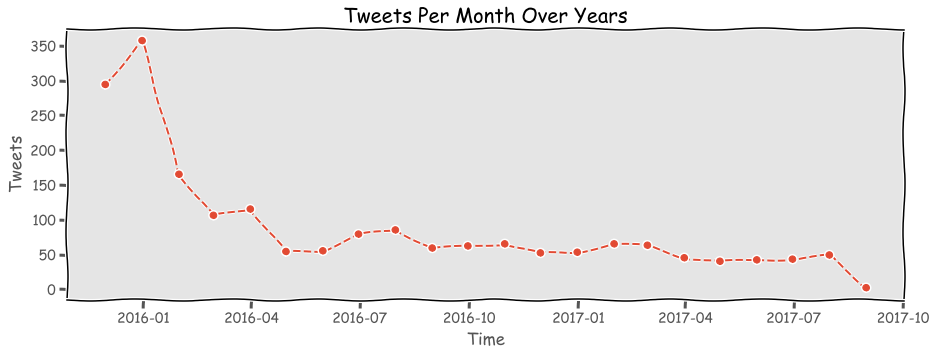

In [48]:
#plotting account activity over time
plt.style.use("ggplot")
plt.xkcd()
plt.figure(figsize=(15,5))

plt.plot_date(x = monthly.index, y = monthly['tweet_id'], linestyle = '--')

plt.title("Tweets Per Month Over Years")
plt.xlabel("Time")
plt.ylabel("Tweets")

plt.tight_layout;

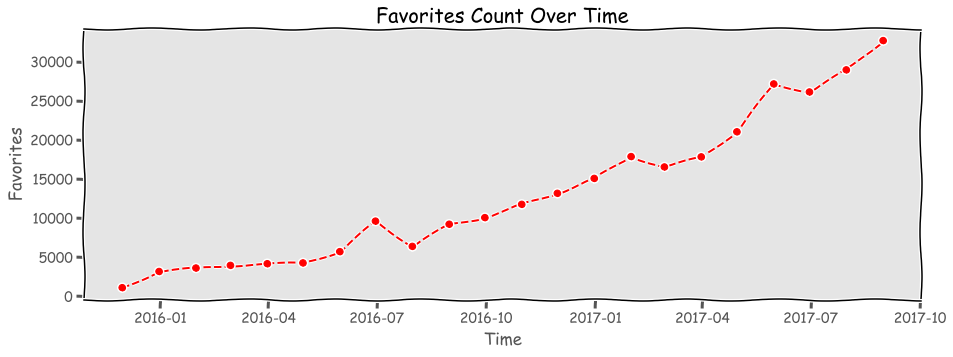

In [49]:
#plotting favorites growth over time
plt.figure(figsize=(15,5))

plt.plot_date(x = monthly.index, y = monthly['favs_count'], linestyle = '--', color = 'r')

plt.title("Favorites Count Over Time")
plt.xlabel("Time")
plt.ylabel("Favorites");

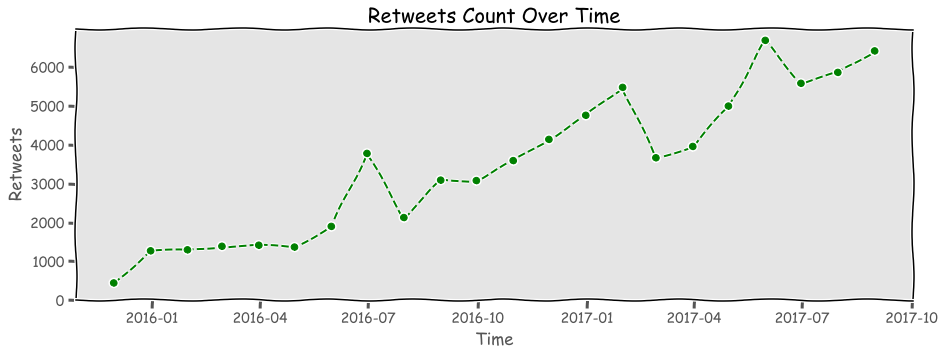

In [50]:
#plotting retweets growth over time
plt.figure(figsize=(15,5))

plt.plot_date(x = monthly.index, y = monthly['retweets'], linestyle = '--', color = 'g')
plt.ylim(ymin = 0)

plt.title("Retweets Count Over Time")
plt.xlabel("Time")
plt.ylabel("Retweets");

In [51]:
loved_class = master_tweets_df.groupby('dog_class').mean()

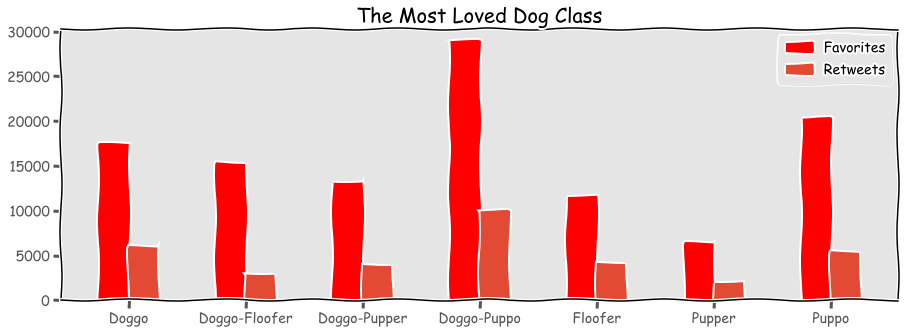

In [52]:
#Wondring which class is the most loved by people?

plt.figure(figsize=(15,5))
x_labels = loved_class.index
x_loc = np.arange(len(x_labels))
w = 0.25

plt.bar(x_loc, loved_class.favs_count, width = w, label = 'Favorites', color = 'r')
plt.bar(x_loc + w, loved_class.retweets, width = w, label = 'Retweets')

plt.title("The Most Loved Dog Class")
plt.xticks(ticks = x_loc+w/2, labels = x_labels)
plt.legend();

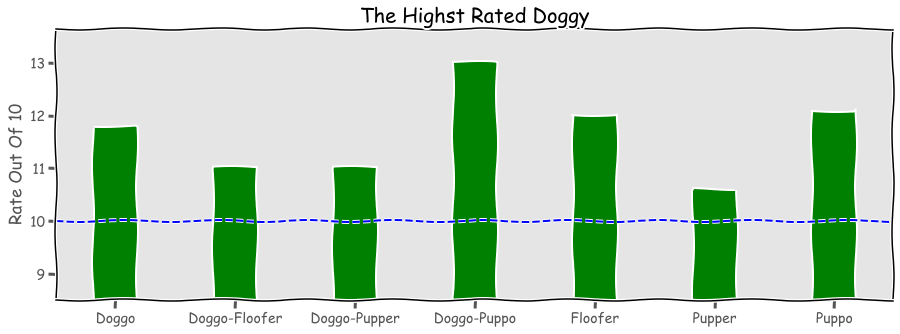

In [53]:
#Does the Admin agree too?
plt.figure(figsize=(15,5))
plt.bar(x_labels, loved_class.rate_out_of_10, width = 0.35, color = 'g')
plt.axhline(y=10.0, color='b', linestyle='--') 
plt.ylim(ymin = 8.5) 
plt.title("The Highst Rated Doggy")
plt.ylabel("Rate Out Of 10");

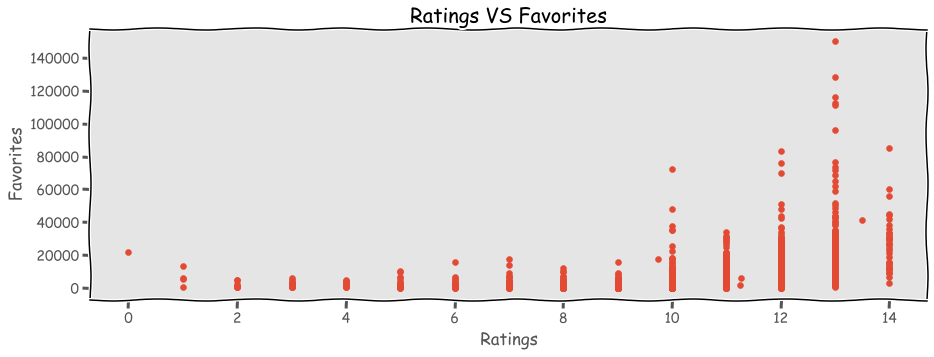

In [54]:
#Do people agree with his ratings?
plt.figure(figsize=(15,5))
rating = master_tweets_df.rate_out_of_10
favs = master_tweets_df.favs_count
plt.scatter(rating, favs)
plt.title("Ratings VS Favorites")
plt.xlabel("Ratings")
plt.ylabel("Favorites");

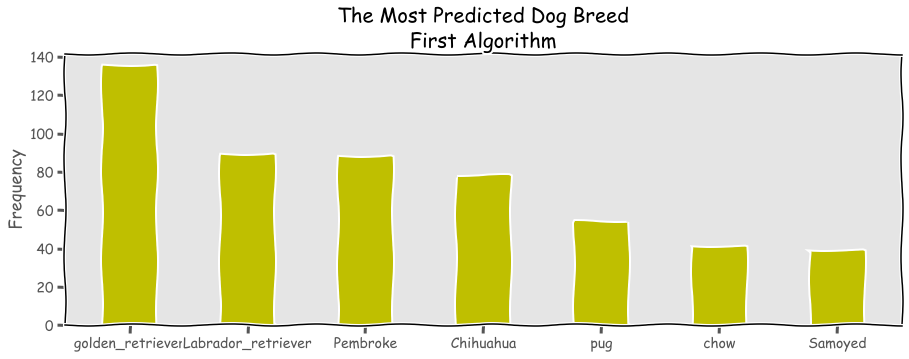

In [55]:
#the most predicted dog_breed
breed1 = master_tweets_df.breed_1.value_counts().head(7)
plt.figure(figsize=(15,5))
plt.bar(breed1.index, breed1.values, width = 0.45, color = 'y')
plt.title("The Most Predicted Dog Breed\nFirst Algorithm")
plt.ylabel("Frequency");

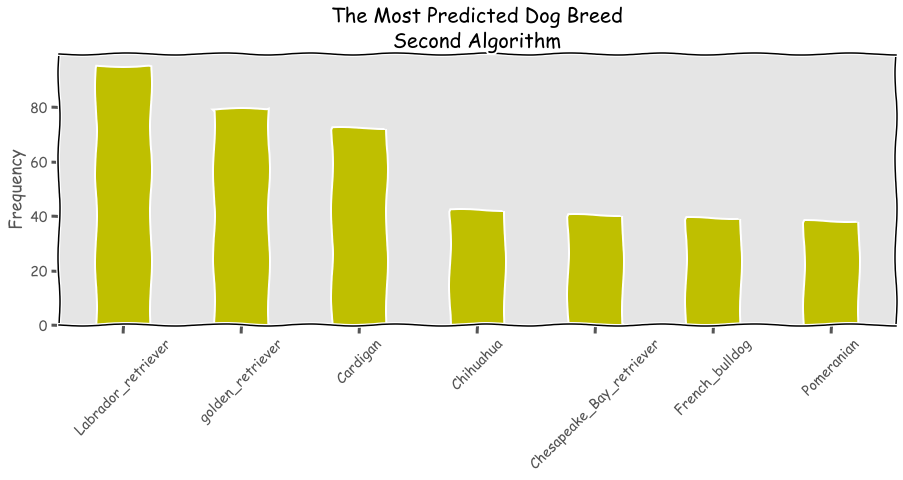

In [56]:
#the most predicted dog_breed
breed2 = master_tweets_df.breed_2.value_counts().head(7)
plt.figure(figsize=(15,5))
plt.bar(breed2.index, breed2.values, width = 0.45, color = 'y')
plt.title("The Most Predicted Dog Breed\nSecond Algorithm")
plt.xticks(rotation = 45)
plt.ylabel("Frequency");

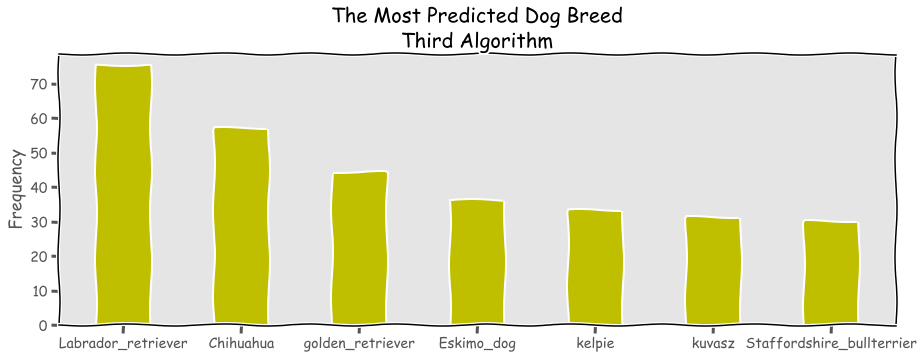

In [57]:
#the most predicted dog_breed
breed3 = master_tweets_df.breed_3.value_counts().head(7)

plt.figure(figsize=(15,5))

plt.bar(breed3.index, breed3.values, width = 0.45, color = 'y')

plt.title("The Most Predicted Dog Breed\nThird Algorithm")
plt.ylabel("Frequency");